In [1]:
using QuantumOptics
using SparseArrays
using Plots
using LinearAlgebra
using ProgressMeter
using Revise
using LaTeXStrings
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("KM_Model.jl")

In [12]:
Nx = 4
Ny = 4
p = 1
q = 2
pn = 2
U = 1000

N = Nx*Ny
t = 1
NPhi0 = Int(Nx*Ny*(p/q))
#PN = vcat( ( [i] for i in 0:pn) ... )
# Cut_Off = NPhi0
Cut_Off = NPhi0

8

In [87]:
# PROJECTION CODE
matrix = KM(Nx, Ny, t, p, q)
H = Sp_Op(N, matrix)
H_sp_Sub, Sub_Basis, P, Pt = H_sub(N, H, Cut_Off)
#lim = 2
HardCore=true
H_MB_sub, basis_cut_mb = H_Kin_MB(Sub_Basis, pn, H_sp_Sub, HardCore)
basis_sp = NLevelBasis(N)
#basis_mb, basis_sp = get_Bosonic_MB_Basis(N, pn, lim)
basis_mb_sub = boson_mb_basis(Sub_Basis, pn, HardCore)
#basis_cut_mb, basis_cut_sp = get_Bosonic_MB_Basis(Cut_Off, PN, lim)
#H_Total = H_Total_Sub(P, Pt, basis_cut_mb, Cut_Off, U, H_MB);
H_Int = Hubbard_Interaction_fixed_prtcl(basis_sp)
H_Int_Sub = Hubbard_Int_fixed_prtc_sub(H_Int, P, Pt, Sub_Basis, basis_mb_sub)
H_Total_hardcore = H_MB_sub + H_Int_Sub 
H_Total_hardcore = (H_Total_hardcore'+H_Total_hardcore)/2

Operator(dim=28x28)
  basis: ManyBody(onebodybasis=Subspace(superbasis=NLevel(N=16), states:8), states:28)
 -2.00003+0.0im      -8.0e-17+1.0e-17im  …       0.0+0.0im
 -8.0e-17-1.0e-17im  -2.00003+0.0im              0.0+0.0im
  8.0e-17-1.1e-16im  -9.0e-17-1.0e-17im          0.0+0.0im
      0.0-3.0e-17im   3.0e-17+1.0e-16im          0.0+0.0im
 -1.0e-16+6.0e-17im   1.6e-16-6.0e-17im          0.0+0.0im
  1.2e-16+2.0e-17im   9.0e-17-4.0e-17im  …  -1.5e-16+3.0e-17im
     -0.0-8.0e-17im  -2.0e-17+3.0e-17im     -1.1e-16+4.0e-17im
  6.0e-17+2.0e-17im  -2.0e-17+7.0e-17im          0.0+0.0im
 -2.0e-17-5.0e-17im       0.0+0.0im              0.0+0.0im
 -8.0e-17+1.0e-17im       0.0+0.0im              0.0+0.0im
         ⋮                               ⋱  
      0.0+0.0im           0.0+0.0im              0.0+0.0im
      0.0+0.0im           0.0+0.0im      …  -4.0e-17-1.0e-17im
      0.0+0.0im           0.0+0.0im          8.0e-17-6.0e-17im
      0.0+0.0im           0.0+0.0im              0.0+0.0im
      

In [88]:
# PROJECTION CODE
matrix = KM(Nx, Ny, t, p, q)
H = Sp_Op(N, matrix)
H_sp_Sub, Sub_Basis, P, Pt = H_sub(N, H, Cut_Off)
#lim = 2
HardCore=false
H_MB_sub, basis_cut_mb = H_Kin_MB(Sub_Basis, pn, H_sp_Sub, HardCore)
basis_sp = NLevelBasis(N)
#basis_mb, basis_sp = get_Bosonic_MB_Basis(N, pn, lim)
basis_mb_sub = boson_mb_basis(Sub_Basis, pn, HardCore)
#basis_cut_mb, basis_cut_sp = get_Bosonic_MB_Basis(Cut_Off, PN, lim)
#H_Total = H_Total_Sub(P, Pt, basis_cut_mb, Cut_Off, U, H_MB);
H_Int = Hubbard_Interaction_fixed_prtcl(basis_sp)
H_Int_Sub = Hubbard_Int_fixed_prtc_sub(H_Int, P, Pt, Sub_Basis, basis_mb_sub)
H_Total_finite = H_MB_sub + H_Int_Sub 
H_Total_finite = (H_Total_finite'+H_Total_finite)/2

Operator(dim=36x36)
  basis: ManyBody(onebodybasis=Subspace(superbasis=NLevel(N=16), states:8), states:36)
    -1.86305+0.0im          …    0.0235557-0.00330451im
 -0.00388253-0.00688455im       0.00975549+0.00288408im
  -0.0105199-0.0121935im        0.00016699+0.00168834im
  0.00178273+0.00268501im      -0.00226401-0.00254412im
 -0.00969374+0.00690254im      0.000130308+0.00145585im
    -0.01261+0.000919886im  …   0.00249399+0.00235781im
   0.0118971-0.00550724im      0.000563689-0.00300725im
   0.0149492+0.000192705im       -0.029254+0.00102323im
   -0.025728+0.00965476im       -0.0225732-0.000760048im
   0.0233823-0.0261484im        0.00667013+7.43044e-6im
            ⋮               ⋱             ⋮
  0.00725511+0.00623833im      -0.00367041+0.00745694im
 -0.00847492-0.0165561im       -0.00975577-0.00240875im
 -0.00358957-0.00717512im      0.000258552-0.00301711im
   0.0306973+0.00492173im   …   0.00408872+0.00608701im
  -0.0142061-0.00137411im      -0.00119939-0.00371621im
  0.0016

In [89]:
ϵ_hard_core, λ_hard_core = eigenstates(H_Total_hardcore);

In [90]:
ϵ_finite, λ_finite = eigenstates(H_Total_finite);

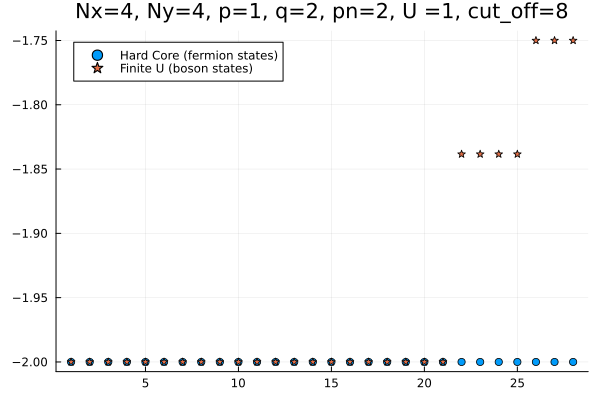

In [91]:
n=1
m=28
scatter(ϵ_hard_core[n:m], label="Hard Core (fermion states)", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U), cut_off=$(Cut_Off)")
scatter!(ϵ_finite[n:m], label="Finite U (boson states)",marker=:star)

In [13]:
# WITHOUT PROJECTION
matrix = KM(Nx, Ny, t, p, q)
H = Sp_Op(N, matrix)
#lim = 1
HardCore=true
basis_mb, basis_sp = get_Bosonic_MB_Basis(N, pn, HardCore)
H_MB_sub, basis_mb = H_Kin_MB(basis_sp, pn, H, HardCore)
H_Int = Hubbard_Interaction_Full(basis_sp, basis_mb)
H_Total_full_hard_Core = H_MB_sub + H_Int
H_Total_full_hard_Core = (H_Total_full_hard_Core'+H_Total_full_hard_Core)/2

Operator(dim=120x120)
  basis: ManyBody(onebodybasis=NLevel(N=16), states:120)sparse([2, 3, 4, 5, 6, 7, 8, 9, 10, 11  …  104, 105, 109, 110, 113, 114, 116, 117, 118, 119], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

In [14]:
E_full_hard_core, λ_full_hard_core = eigenstates(dense(H_Total_full_hard_Core));
E_full_hard_core

120-element Vector{Float64}:
 -2.0000278988361444
 -2.0000278988361435
 -2.000027898836143
 -2.000027898836143
 -2.000027898836143
 -2.000027898836143
 -2.000027898836143
 -2.000027898836143
 -2.000027898836142
 -2.000027898836142
  ⋮
  2.345741656178165
  2.345741656178165
  2.345741656178165
  2.3457416561781654
  2.3457416561781654
  2.3457416561781654
  2.3457416561781663
  2.3457416561781668
  2.7213344972282436

In [15]:
# WITHOUT PROJECTION
matrix = KM(Nx, Ny, t, p, q)
H = Sp_Op(N, matrix)
#lim = 1
HardCore=false
basis_mb, basis_sp = get_Bosonic_MB_Basis(N, pn, HardCore)
H_MB_sub, basis_mb = H_Kin_MB(basis_sp, pn, H, HardCore)
H_Int = Hubbard_Interaction_Full(basis_sp, basis_mb)
H_Total_full_finite = H_MB_sub + H_Int
H_Total_full_finite = (H_Total_full_finite'+H_Total_full_finite)/2

Operator(dim=136x136)
  basis: ManyBody(onebodybasis=NLevel(N=16), states:136)sparse([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  91, 100, 108, 115, 121, 126, 130, 133, 135, 136], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1

In [16]:
E_full_finite, λ_full_finite = eigenstates(dense(H_Total_full_finite));
E_full_finite

136-element Vector{Float64}:
   -2.0000278988363043
   -2.00002789883628
   -2.0000278988362146
   -2.0000278988362084
   -2.000027898836198
   -2.0000278988361844
   -2.000027898836167
   -2.0000278988361573
   -2.0000278988361497
   -2.000027898836146
    ⋮
 1000.0020302725277
 1000.0020302725279
 1000.0024383498611
 1000.0024383498622
 1000.0028889367367
 1000.0028889367367
 1000.0028889367383
 1000.0028889367384
 1000.003424888952

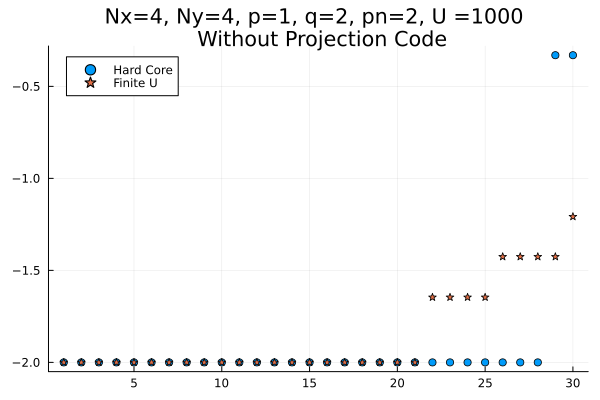

In [18]:
#ion()
n=1
m=30
scatter(E_full_hard_core[n:m], label="Hard Core", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U) \n Without Projection Code")
scatter!(E_full_finite[n:m], label="Finite U",marker=:star)

#show()

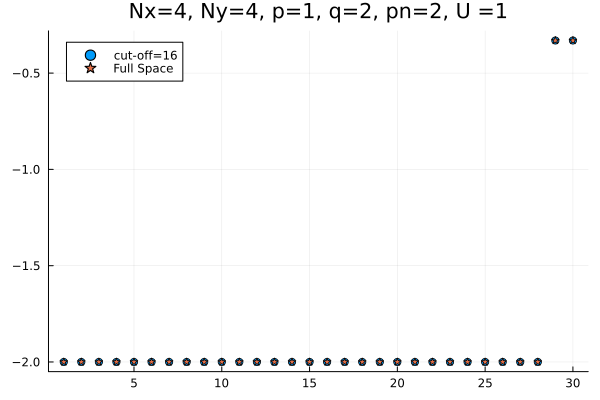

In [34]:
#ion()
n=1
m=30
scatter(ϵ[n:m], label="cut-off=$(Cut_Off)", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U)")
scatter!(E_full[n:m], label="Full Space",marker=:star)

#show()

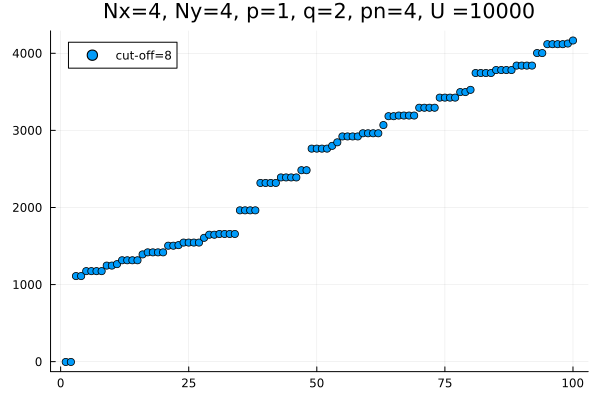

In [28]:
scatter(ϵ[1:100], label="cut-off=$(Cut_Off)", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U)")

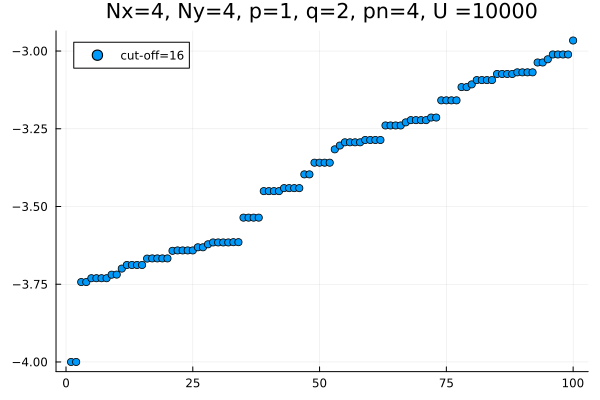

In [34]:
scatter(ϵ[1:100], label="cut-off=$(Cut_Off)", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U)")